# Exploratory Data Analysis - Control Group

Analyzes data collected in `1_Data_Collection_Control_Group.ipynb`.

Assesses normality of data distributions for each text type using histograms, QQ plots, and Shapiro-Wilk test.

Visualizes distributions comparison of characters, words, and tokens across different text types using histograms and box plots.

Uses Kolmogorov-Smirnov test to compare shape of distributions between text types.

Determines which template-specific length defnining keywords will be used for the experimental group, basing on 25th, 50th, and 75th percentiles of the control group distributions.

# Setup

In [1]:
import pandas as pd
from scipy.stats import zscore, shapiro, probplot, ks_2samp
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

sns.set(style="whitegrid")

# Loading data, printing head

In [2]:
def read_data(type: str):
    # possible values for type: "email", "social", "cover", "essay", "explanation"
    df = pd.read_csv(f"data/raw_control_group/{type}_control.csv")
    return df

In [3]:
read_data("email").head()

,Unnamed: 0,text,chars,words,tokens
0,0,Subject: Introduction of Paper Company and Off...,1093,174,211
1,1,"Dear [Recipient],\n\nI hope this email finds y...",983,162,188
2,2,Subject: Introduction of [Company Name] and Pr...,1419,237,282
3,3,"Dear [Recipient],\n\nI hope this email finds y...",1198,194,229
4,4,Subject: Introduction to our paper company and...,1206,203,244


In [4]:
read_data("social").head()

,Unnamed: 0,text,chars,words,tokens
0,0,🔥 Exciting news from OpenAI! They have just an...,849,140,174
1,1,Exciting news from OpenAI! 🎉 They just announc...,497,82,121
2,2,Exciting news! OpenAI has just announced a bre...,709,110,140
3,3,"Hey followers, have you heard about the exciti...",758,116,145
4,4,📣 Big news from OpenAI! The renowned research ...,660,112,155


In [5]:
read_data("cover").head()

,Unnamed: 0,text,chars,words,tokens
0,0,"Dear Hiring Manager,\n\nI am writing to expres...",1382,236,270
1,1,"Dear Hiring Manager,\n\nI am writing to expres...",1367,226,260
2,2,"Dear Hiring Manager,\n\nI am excited to apply ...",1363,221,249
3,3,"Dear Hiring Manager,\n\nI am writing to expres...",1272,216,238
4,4,"Dear [Hiring Manager],\n\nI am writing to expr...",1383,217,251


In [6]:
read_data("essay").head()

,Unnamed: 0,text,chars,words,tokens
0,0,Prompt engineering is the process of designing...,2259,322,368
1,1,"Prompt engineering, the ability to rapidly cre...",2653,411,470
2,2,Prompt engineering can be defined as the abili...,2514,379,432
3,3,Prompt engineering is the process of developin...,2648,393,453
4,4,Prompt engineering is the process of designing...,2223,346,393


In [7]:
read_data("explanation").head()

,Unnamed: 0,text,chars,words,tokens
0,0,Polymorphism is a concept in object-oriented p...,1454,245,279
1,1,Polymorphism is the ability of an object to ta...,1592,246,290
2,2,Polymorphism is a concept in object-oriented p...,1095,179,229
3,3,Polymorphism is the ability of an object to ta...,1670,270,344
4,4,Polymorphism is a concept in object-oriented p...,1118,181,208


# EDA - Explanation, Dimentions, Dtypes, Nulls

### Data Explanation

Columns:
- `text` - response as a string
- `characters` - number of characters in response
- `words` - number of words in response
- `tokens` - number of tokens in response

Each row is a single response from OpenAI API.

Shapes of CSV's are identical with 100 rows and 4 columns.

### Shapes

In [8]:
read_data("email").shape

(100, 5)

In [9]:
# shapes are the same
read_data("email").shape == read_data("social").shape == read_data("cover").shape == read_data("essay").shape == read_data("explanation").shape

True

### Data Types, Nulls

No null values, consistent dtypes

In [10]:
read_data("email").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  100 non-null    int64 
 1   text        100 non-null    object
 2   chars       100 non-null    int64 
 3   words       100 non-null    int64 
 4   tokens      100 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


In [11]:
read_data("social").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  100 non-null    int64 
 1   text        100 non-null    object
 2   chars       100 non-null    int64 
 3   words       100 non-null    int64 
 4   tokens      100 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


In [12]:
read_data("cover").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  100 non-null    int64 
 1   text        100 non-null    object
 2   chars       100 non-null    int64 
 3   words       100 non-null    int64 
 4   tokens      100 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


In [13]:
read_data("essay").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  100 non-null    int64 
 1   text        100 non-null    object
 2   chars       100 non-null    int64 
 3   words       100 non-null    int64 
 4   tokens      100 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


In [14]:
read_data("explanation").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  100 non-null    int64 
 1   text        100 non-null    object
 2   chars       100 non-null    int64 
 3   words       100 non-null    int64 
 4   tokens      100 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


# EDA - Normality Check

Our data **IS** normally distributed for:
- social media posts
- cover letters 
- essays 

Our data is **NOT** normally distributed for 
- emails (almost normal)
- explanations (very skewed)

In [15]:
def plot_normality_comparison(data: pd.DataFrame):
    columns = ['chars', 'words', 'tokens']
    fig, axs = plt.subplots(3, 2, figsize=(14, 18))

    for i, column in enumerate(columns):
        sns.histplot(data[column], kde=True, ax=axs[i, 0])
        axs[i, 0].set_title(f'Distribution of {column}')

        probplot(data[column], plot=axs[i, 1])
        axs[i, 1].set_title(f'QQ Plot of {column}')
        
        stat, p = shapiro(data[column])
        print(f'Shapiro-Wilk Test for {column}: W = {stat:.4f}, p = {p:.4f}')

    plt.tight_layout()
    plt.show()


Shapiro-Wilk Test for chars: W = 0.9718, p = 0.0303
Shapiro-Wilk Test for words: W = 0.9793, p = 0.1179
Shapiro-Wilk Test for tokens: W = 0.9754, p = 0.0575


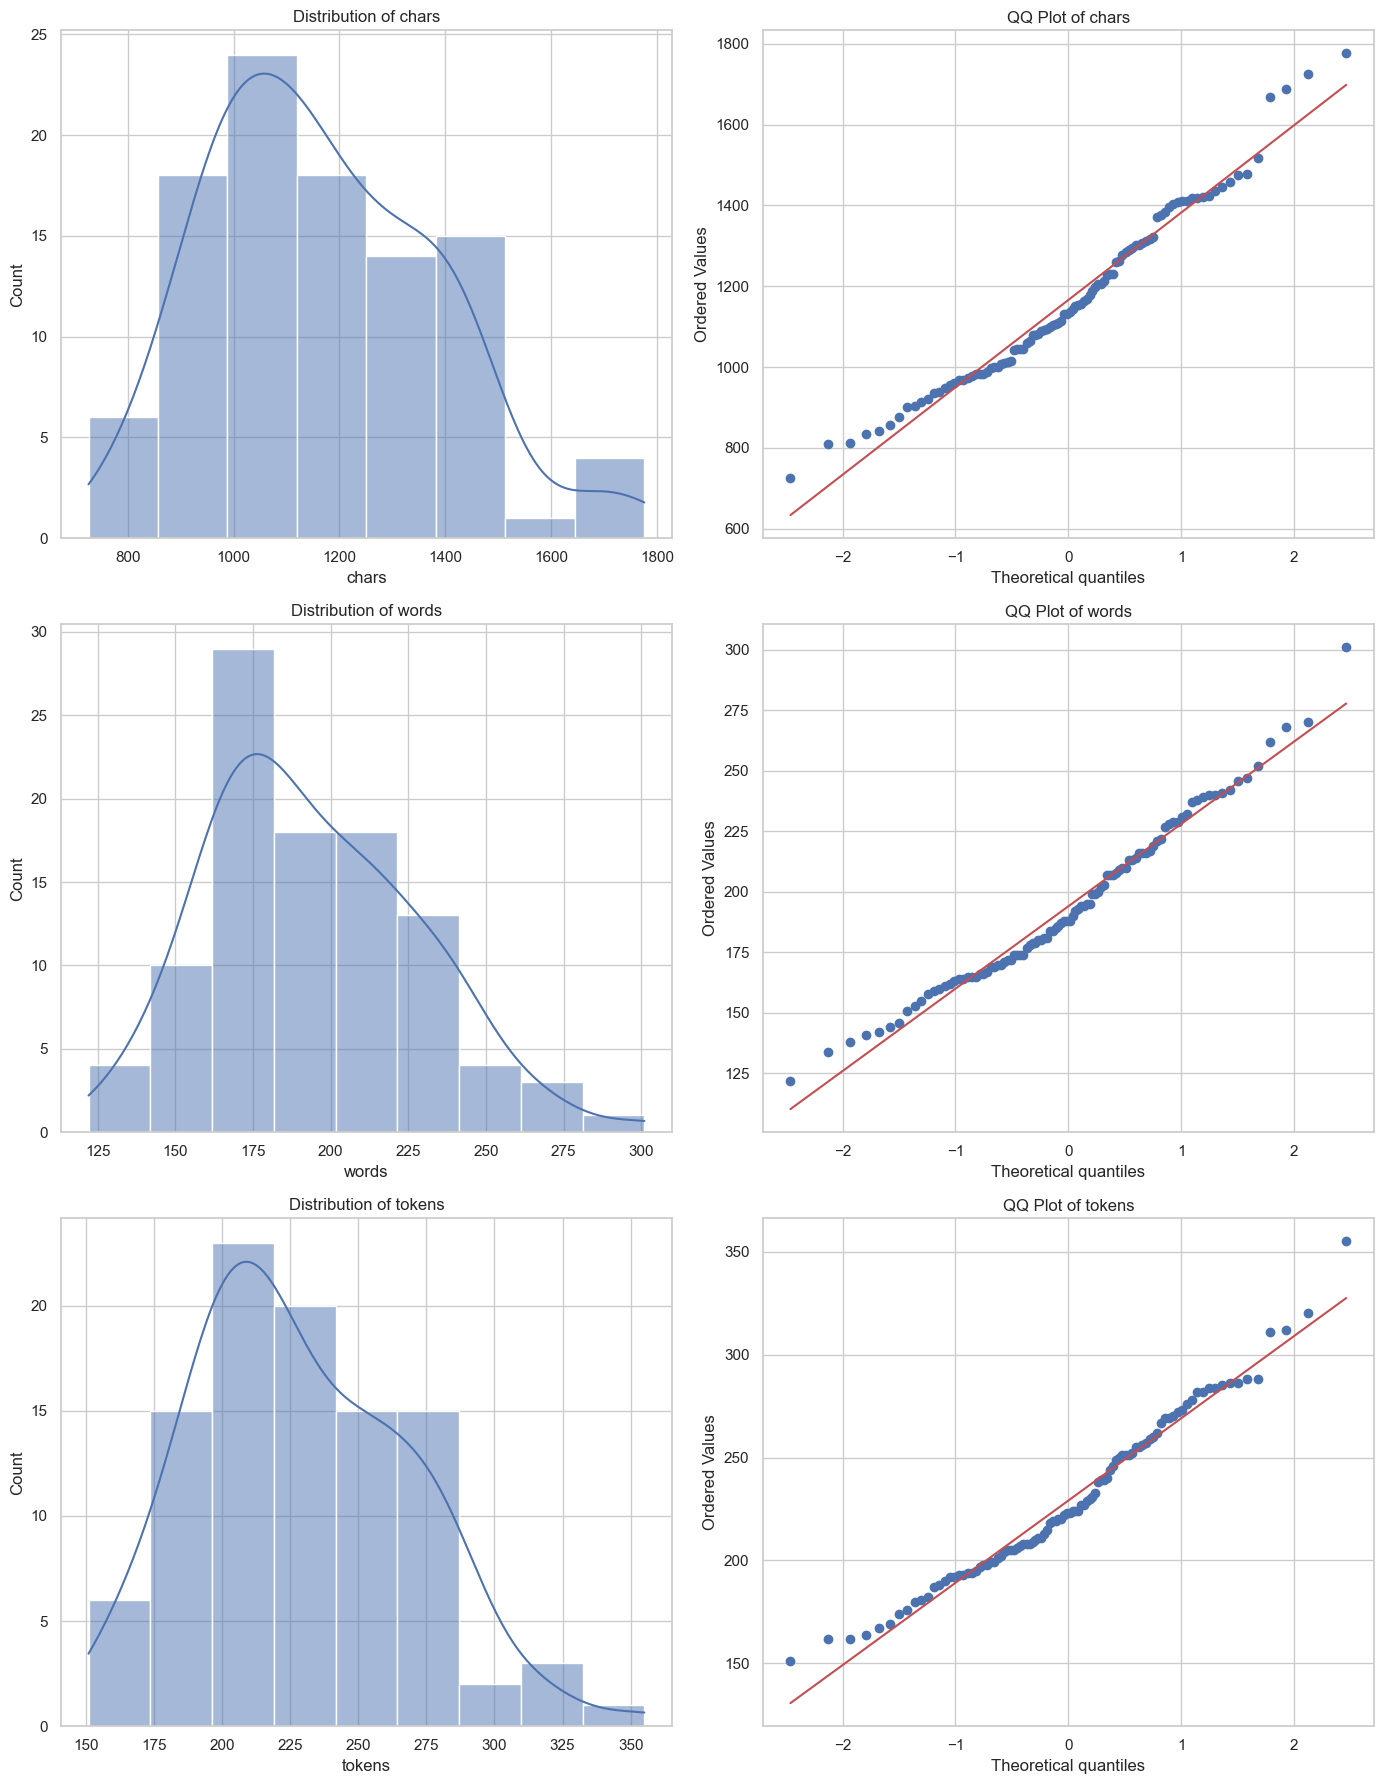

In [16]:
plot_normality_comparison(read_data("email"))

Shapiro-Wilk Test for chars: W = 0.9856, p = 0.3515
Shapiro-Wilk Test for words: W = 0.9817, p = 0.1798
Shapiro-Wilk Test for tokens: W = 0.9829, p = 0.2236


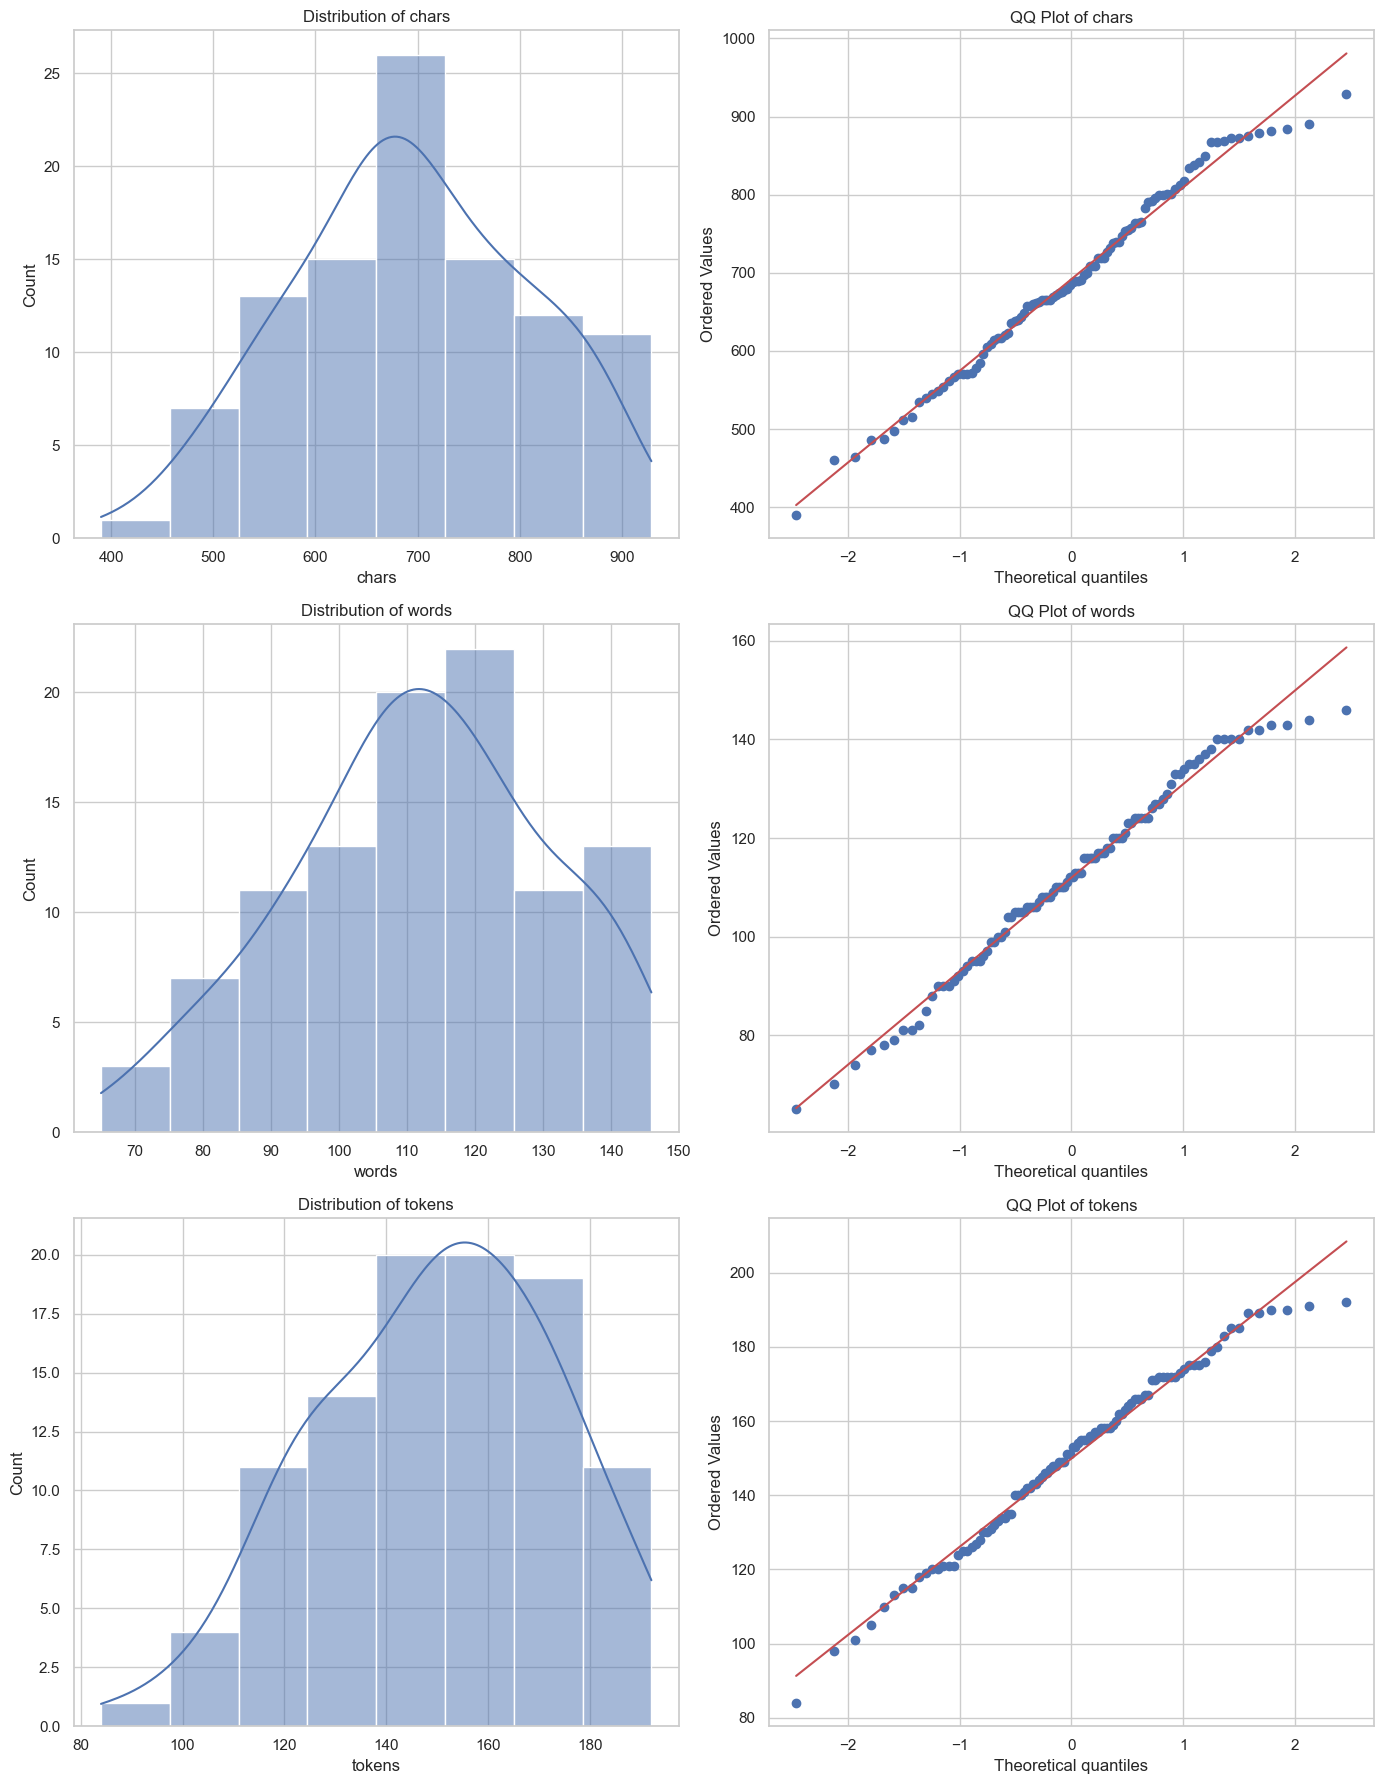

In [17]:
plot_normality_comparison(read_data("social"))

Shapiro-Wilk Test for chars: W = 0.9878, p = 0.4935
Shapiro-Wilk Test for words: W = 0.9904, p = 0.6983
Shapiro-Wilk Test for tokens: W = 0.9891, p = 0.5955


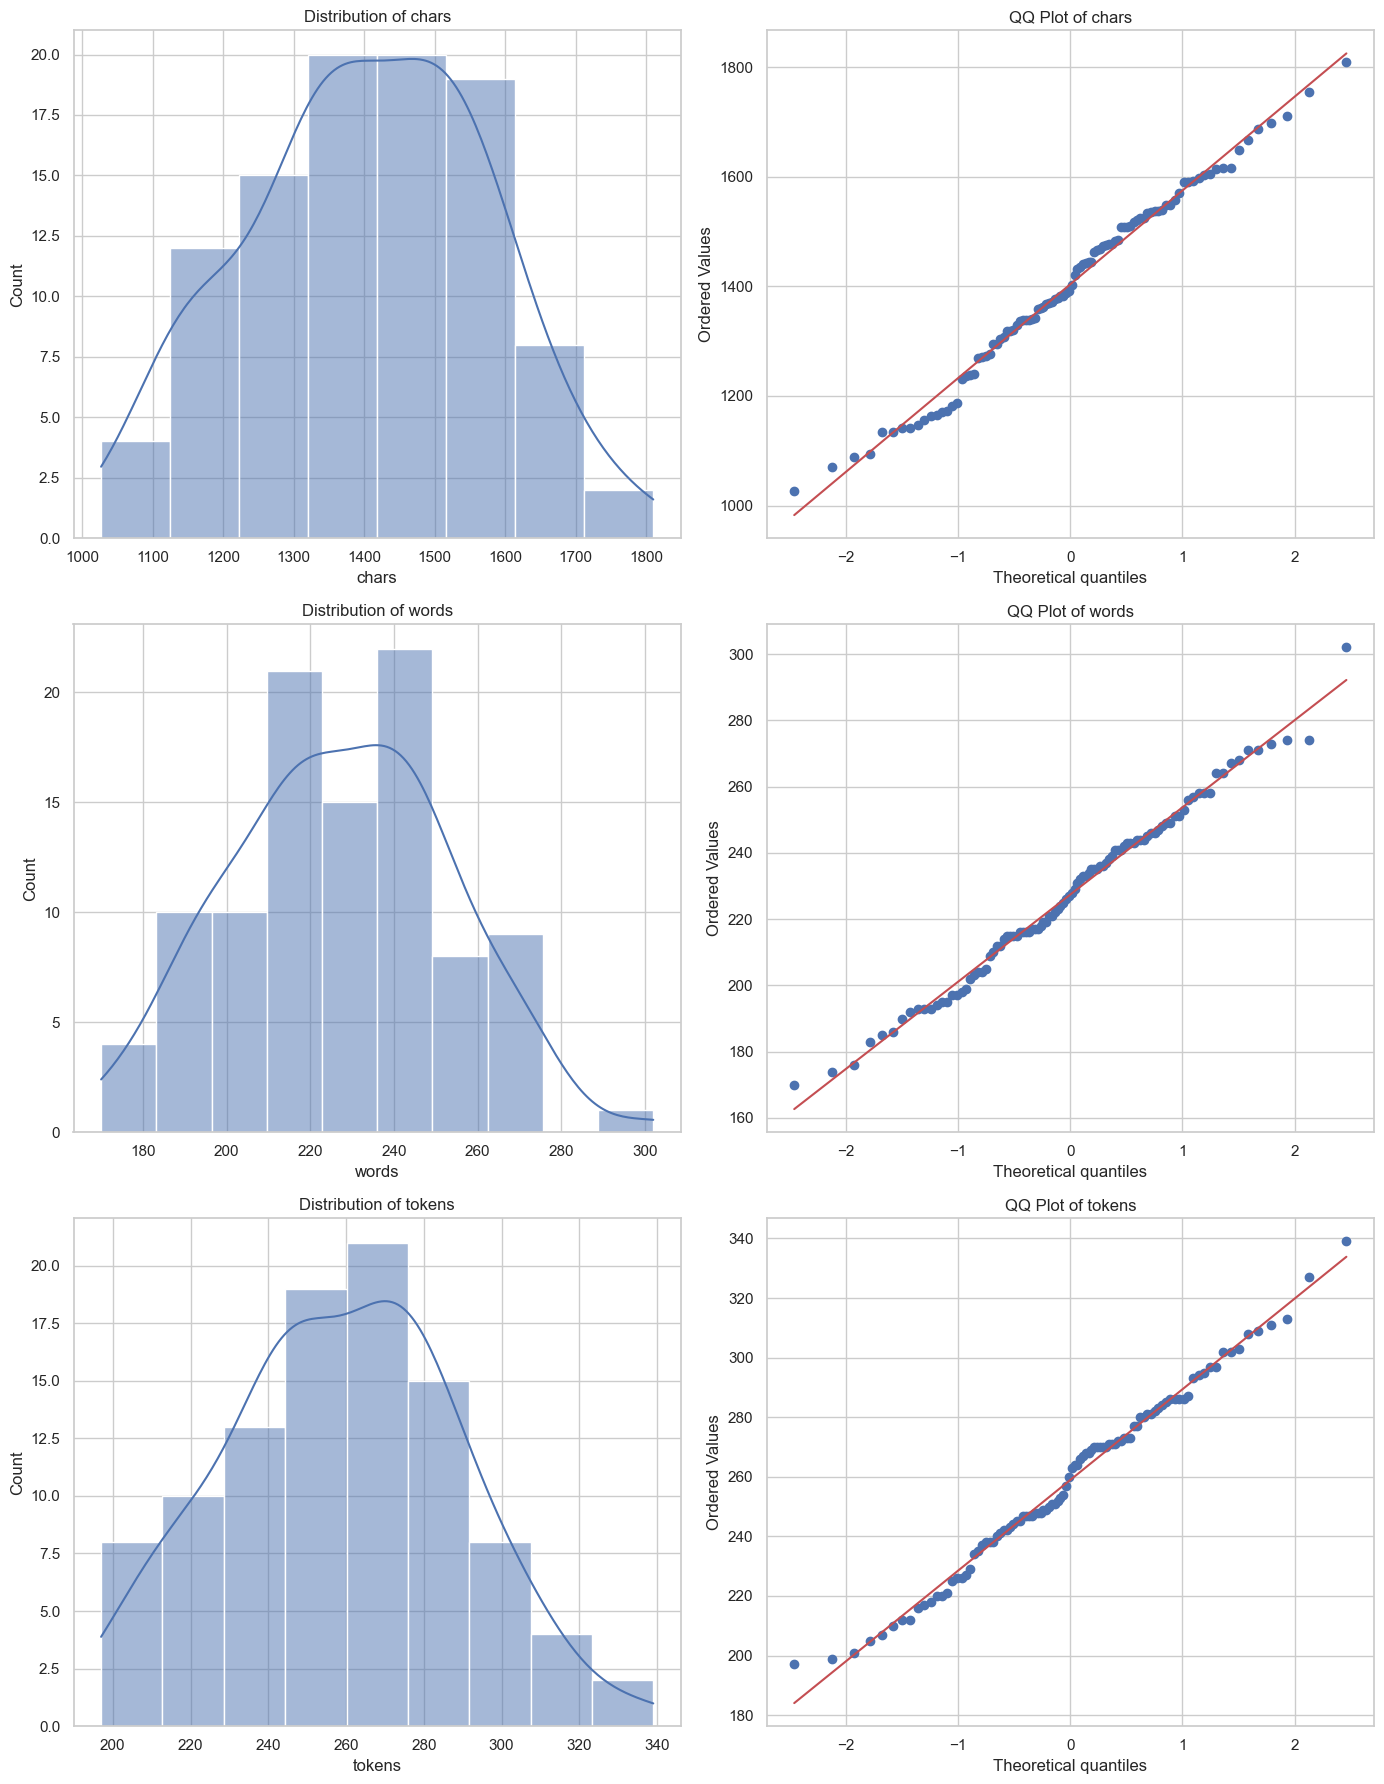

In [18]:
plot_normality_comparison(read_data("cover"))

Shapiro-Wilk Test for chars: W = 0.9932, p = 0.9015
Shapiro-Wilk Test for words: W = 0.9872, p = 0.4527
Shapiro-Wilk Test for tokens: W = 0.9880, p = 0.5056


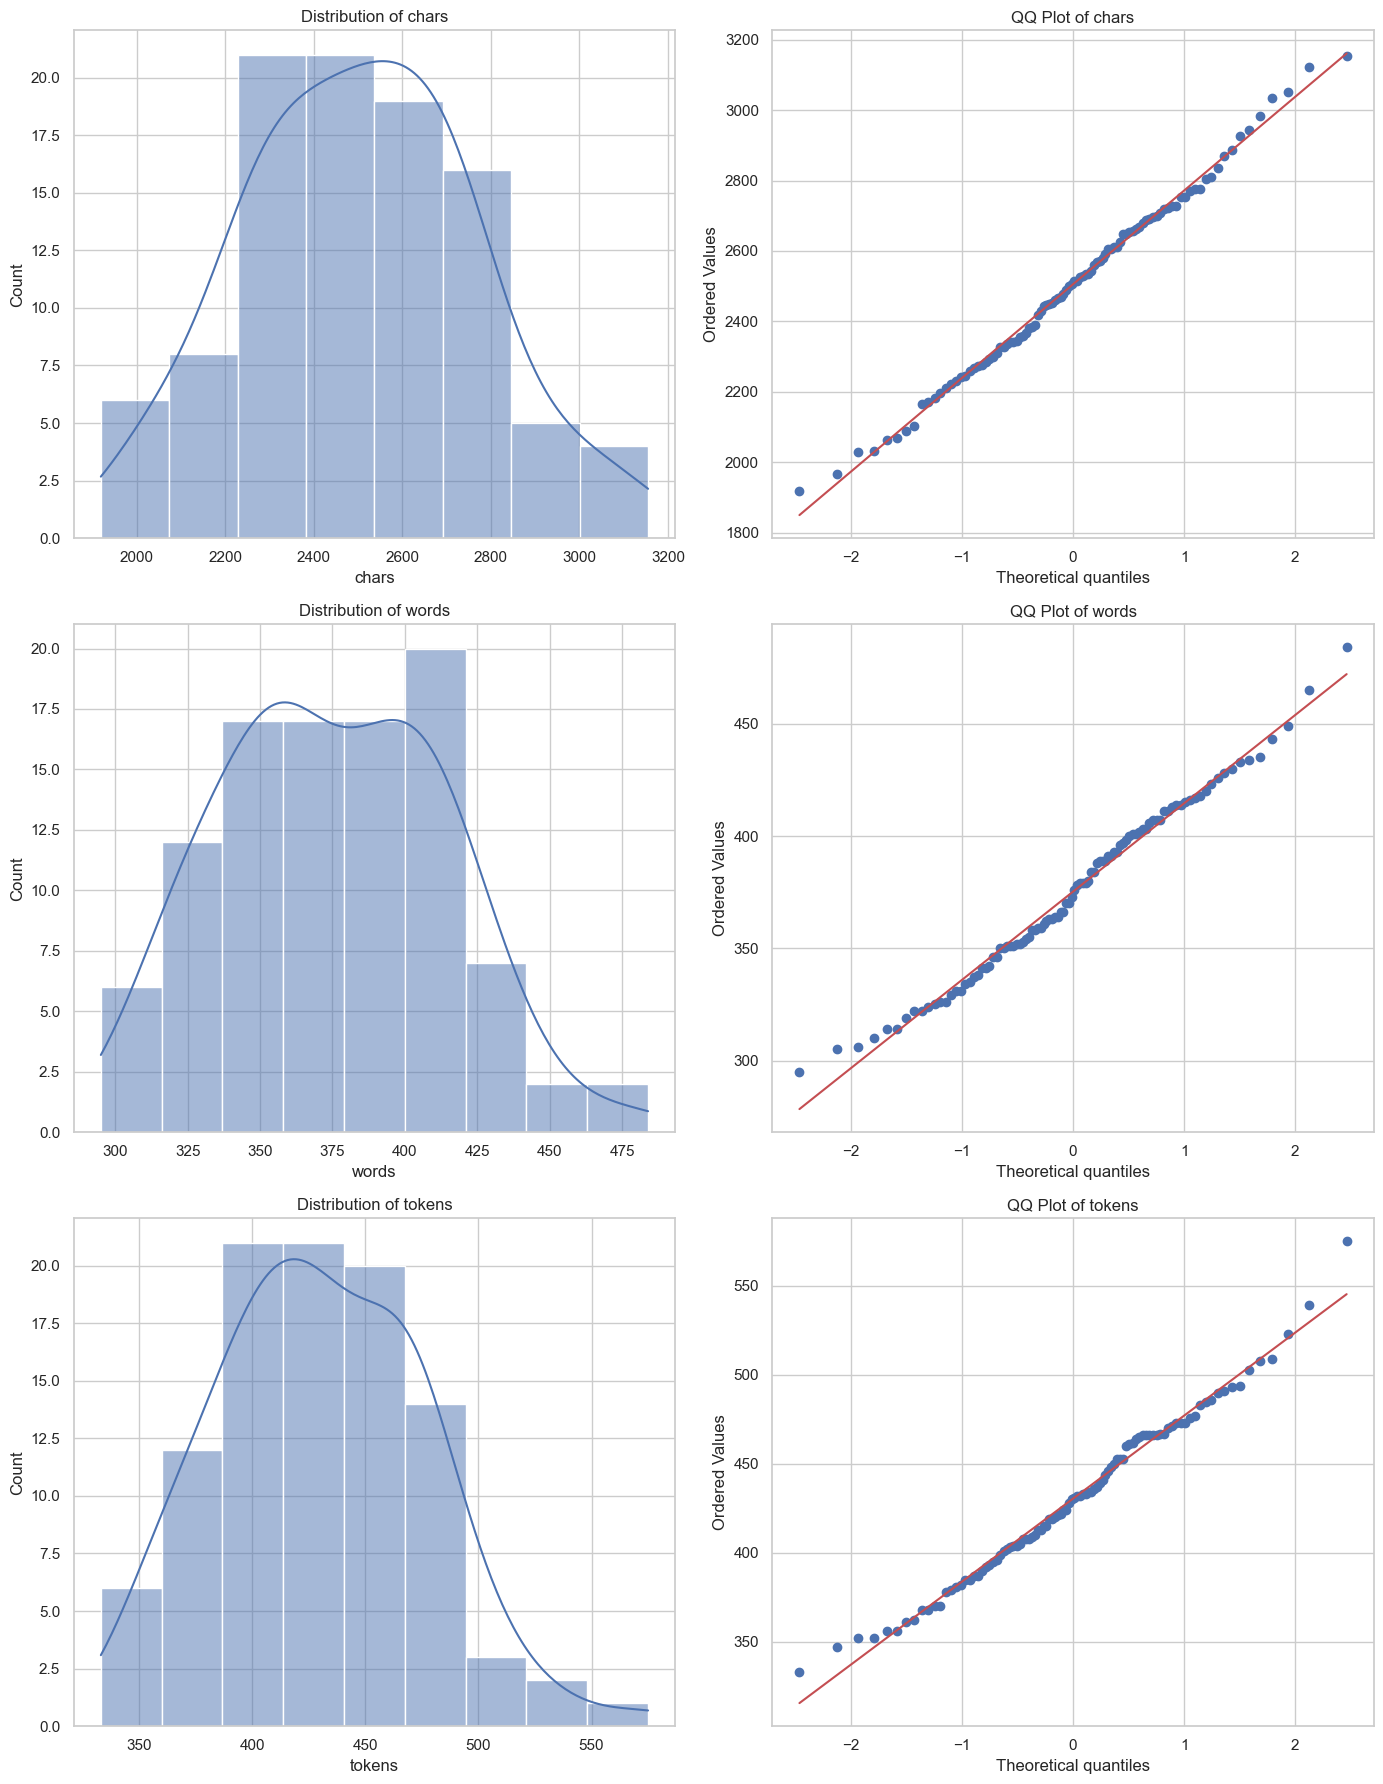

In [19]:
plot_normality_comparison(read_data("essay"))

Shapiro-Wilk Test for chars: W = 0.9276, p = 0.0000
Shapiro-Wilk Test for words: W = 0.9251, p = 0.0000
Shapiro-Wilk Test for tokens: W = 0.8896, p = 0.0000


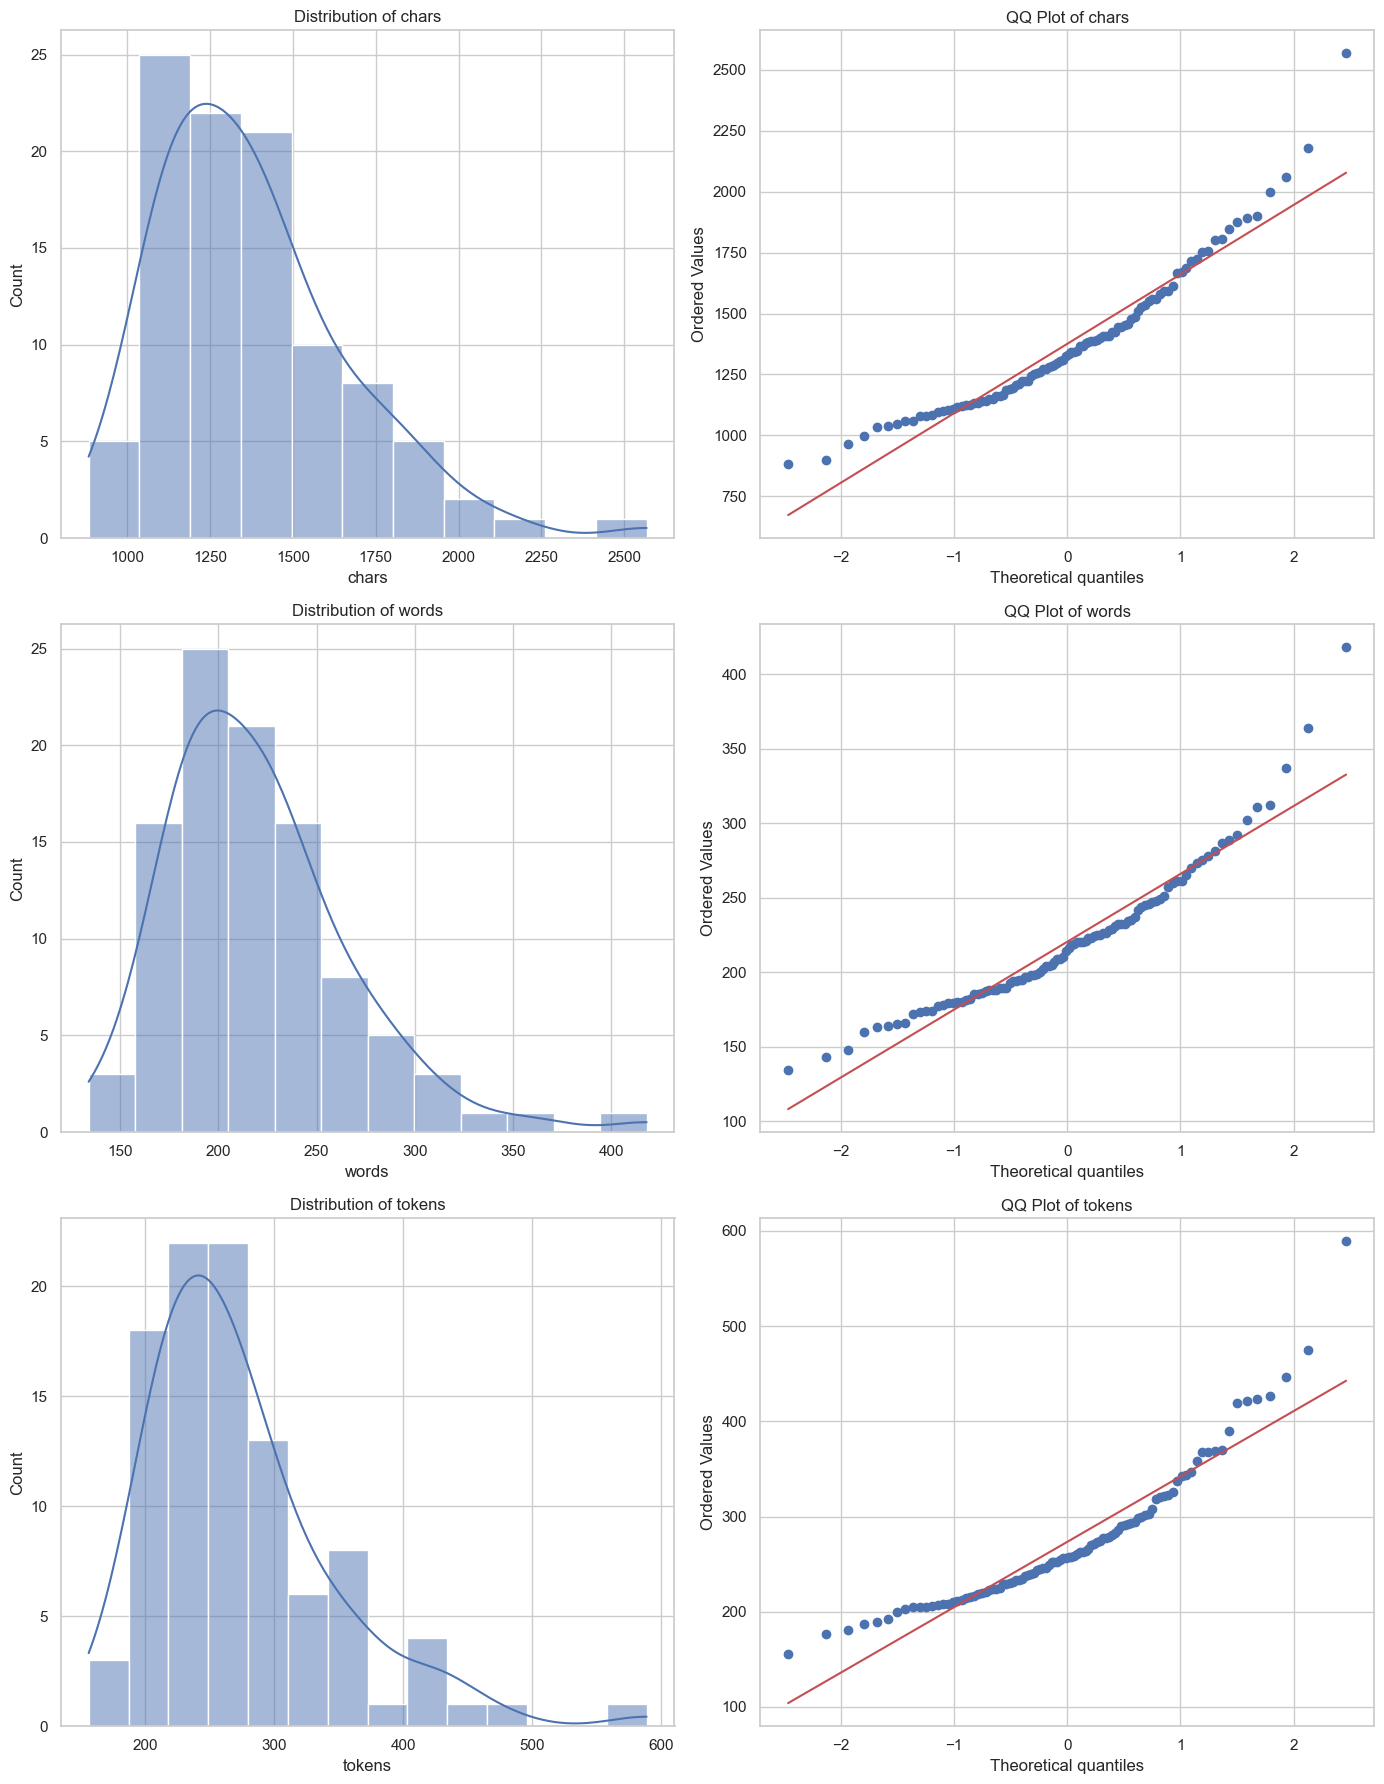

In [20]:
plot_normality_comparison(read_data("explanation"))

# Visualization - Comparing distributions of words, chars and tokens per text type

Visually the **distributions seem to be similar**, but we will check it with statistical tests later.

In [21]:
def normalize_data(data: pd.DataFrame):
    """Normalize data using z-score."""
    data["chars_zscore"] = zscore(data["chars"])
    data["words_zscore"] = zscore(data["words"])
    data["tokens_zscore"] = zscore(data["tokens"])
    return data

def plot_distribution_comparison(data: pd.DataFrame):
    """Visualize distribution of number of characters, words, and tokens in control group.
    Plots histogram and boxplot."""
    normalize_data(data)

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    data_to_plot = ["chars_zscore", "words_zscore", "tokens_zscore"]
    titles = ["Characters", "Words", "Tokens"]

    for i, column in enumerate(data_to_plot):
        sns.histplot(data[column], bins=30, kde=True, ax=axes[0][i])
        axes[0][i].set_title(f"{titles[i]}")

        sns.boxplot(x=data[column], ax=axes[1][i])
        axes[1][i].set_title(f"{titles[i]}")

    plt.tight_layout()  # adjust spacing between subplots
    plt.show()

Email

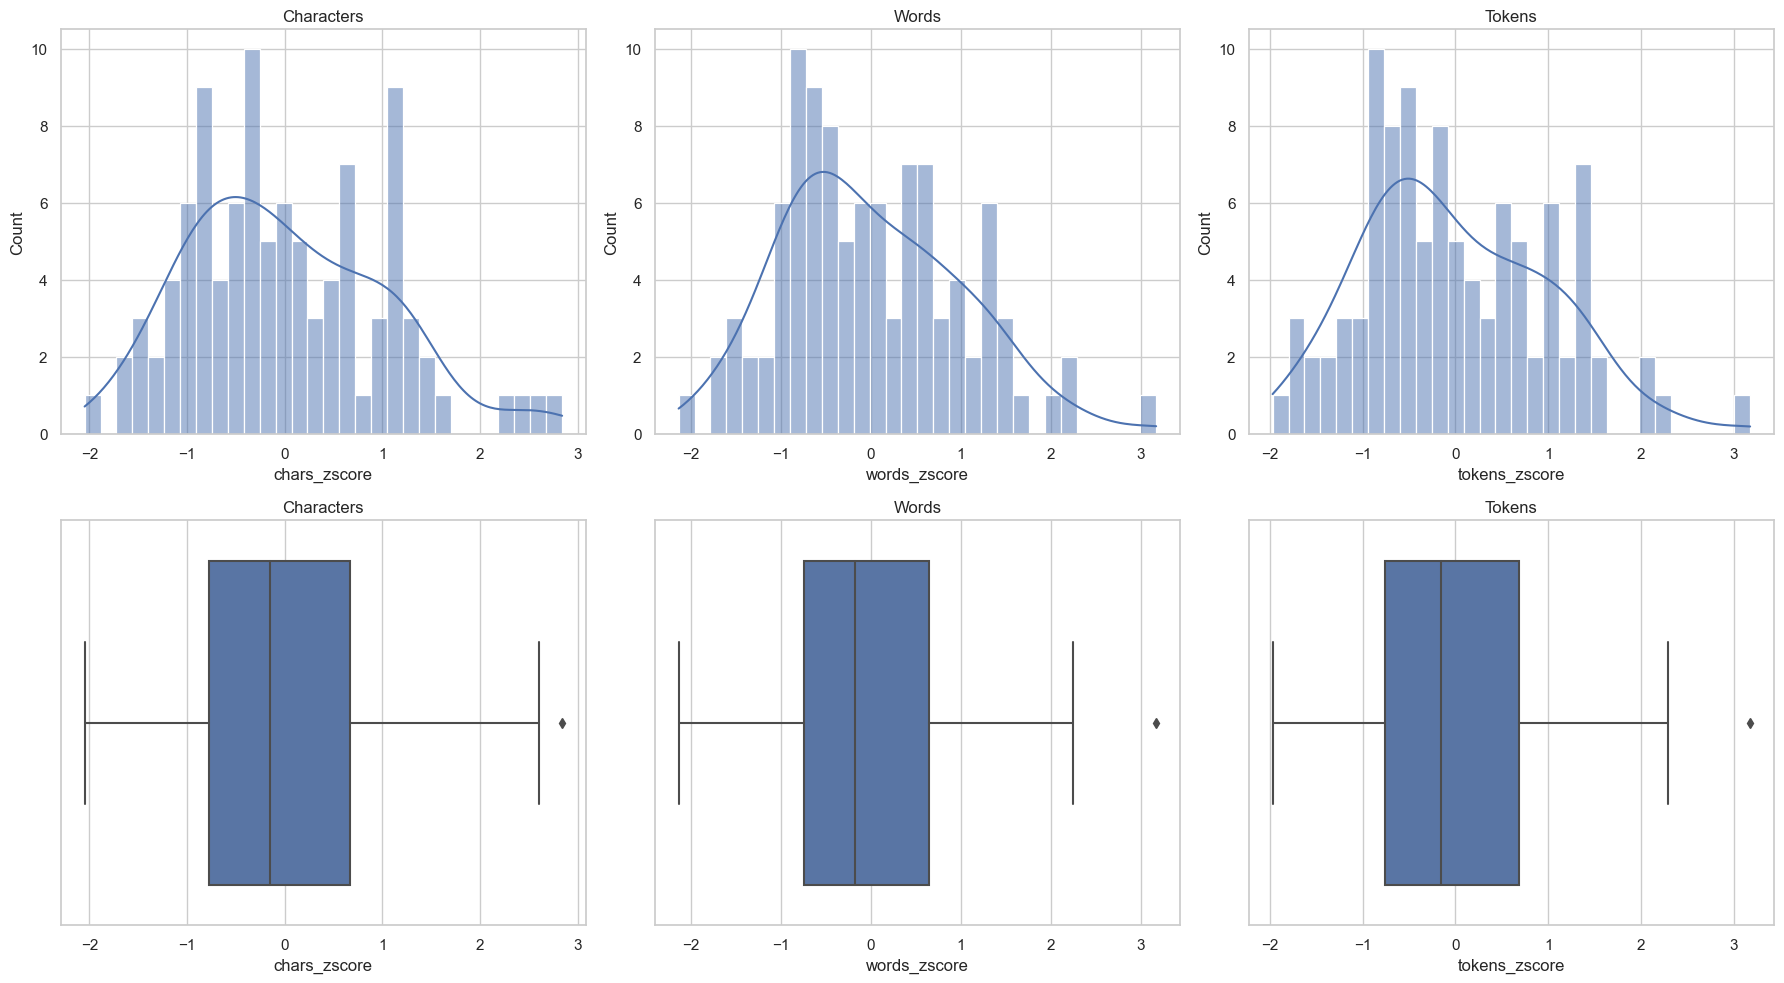

In [22]:
plot_distribution_comparison(read_data("email"))

Social Media Post

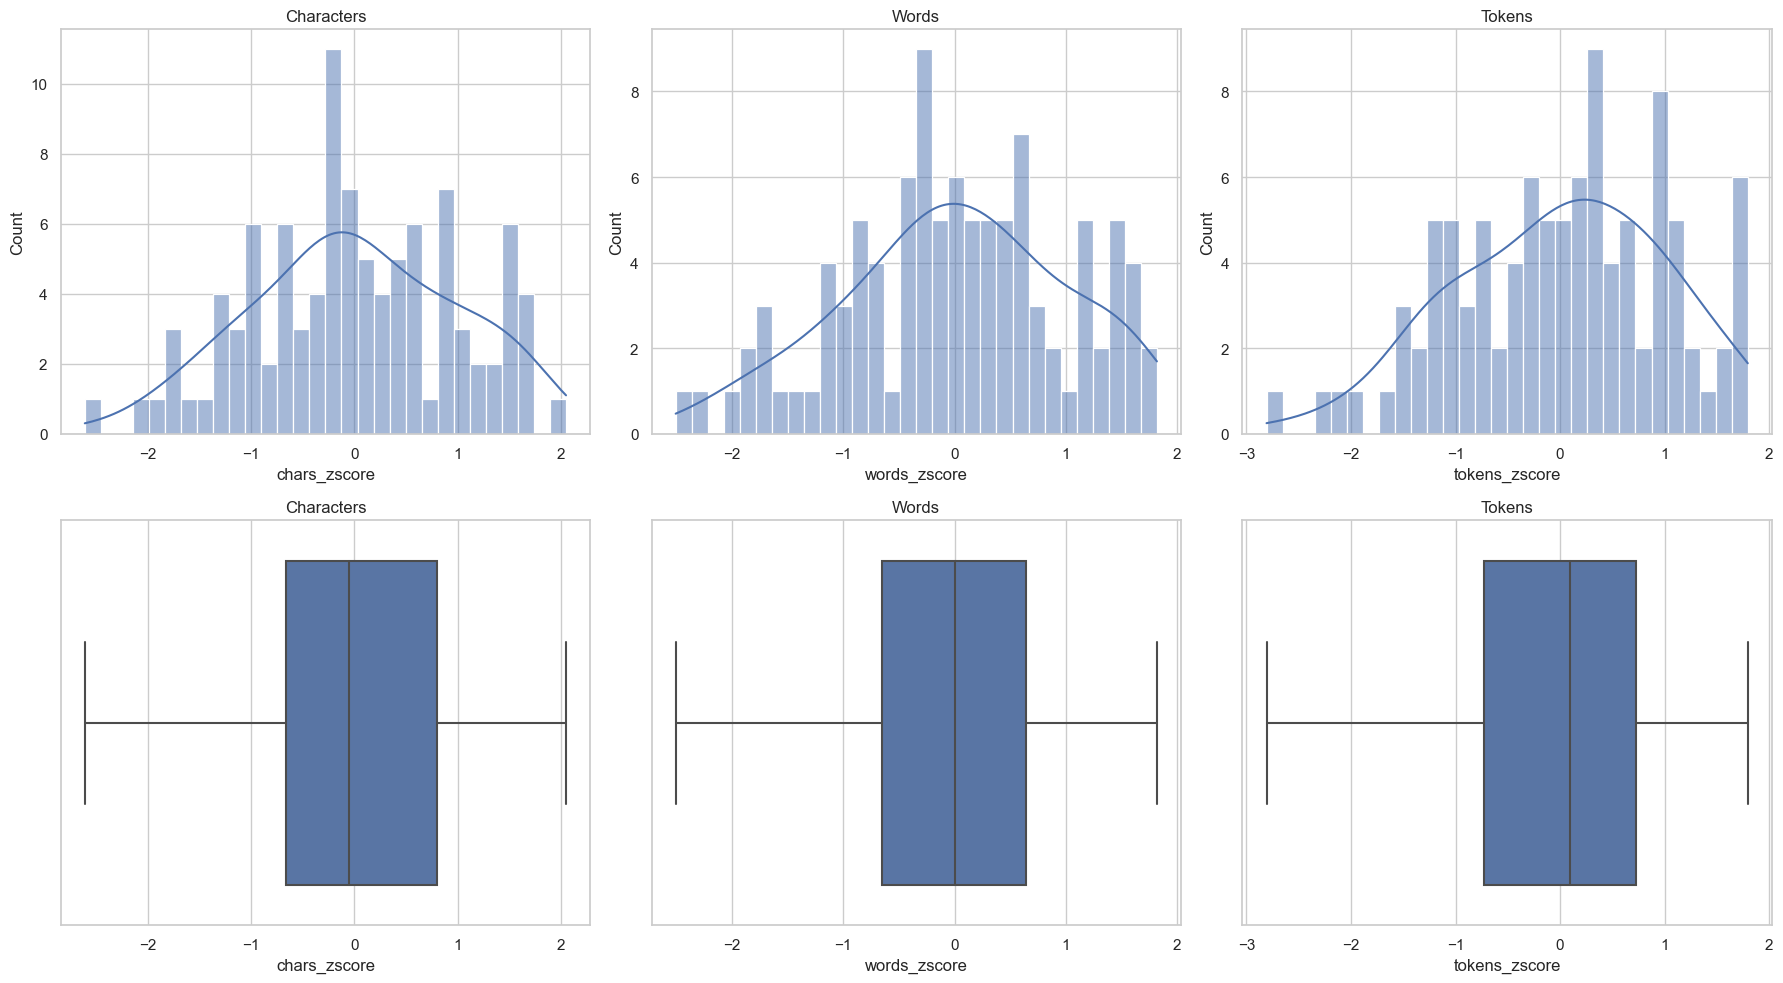

In [23]:
plot_distribution_comparison(read_data("social"))

Cover Letter

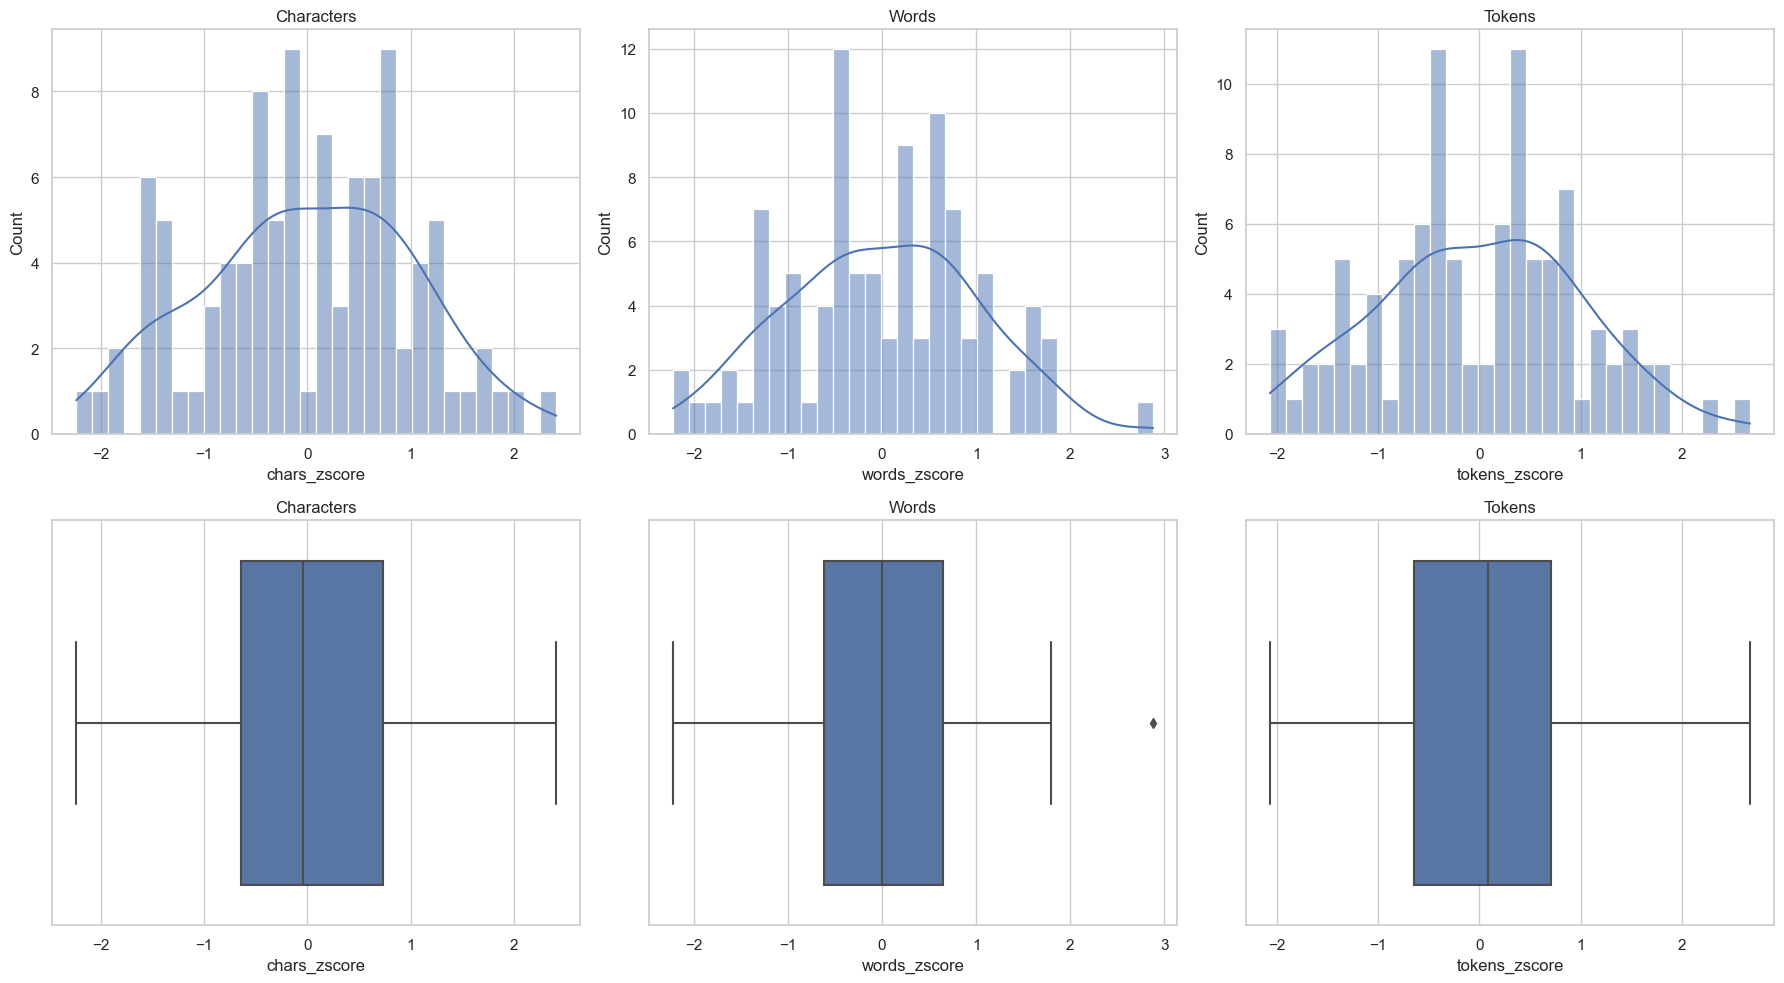

In [24]:
plot_distribution_comparison(read_data("cover"))

Essay

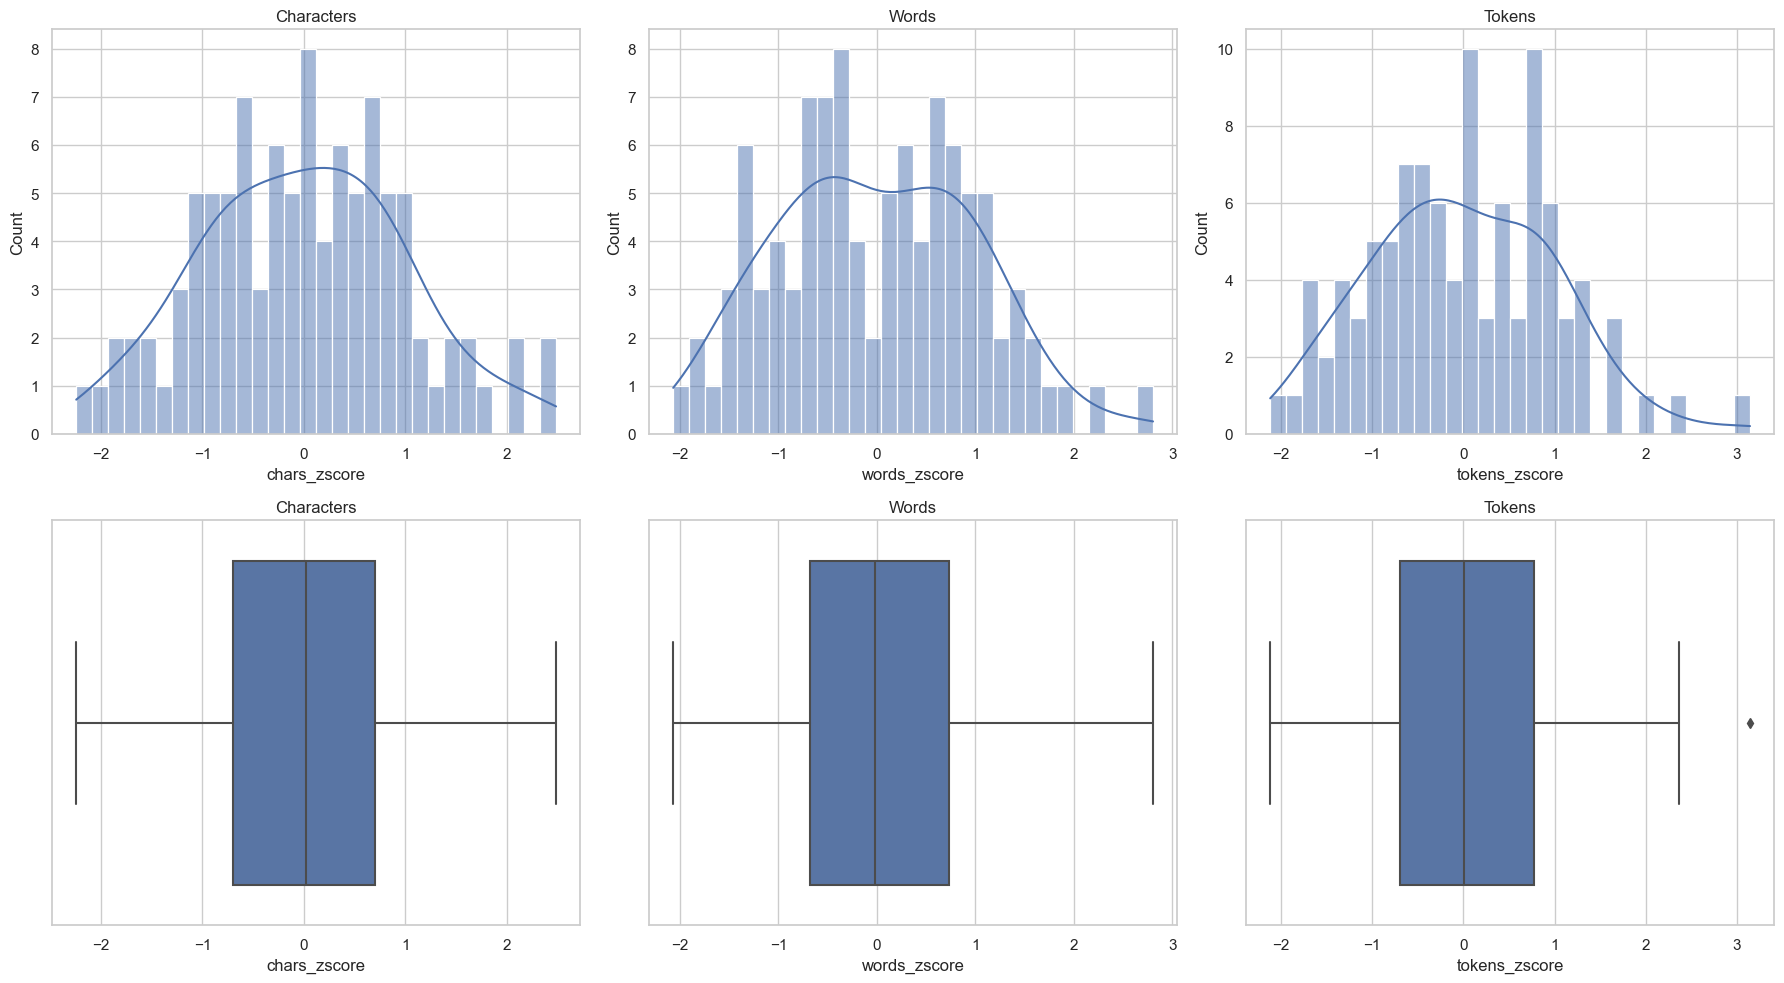

In [25]:
plot_distribution_comparison(read_data("essay"))

Explanation

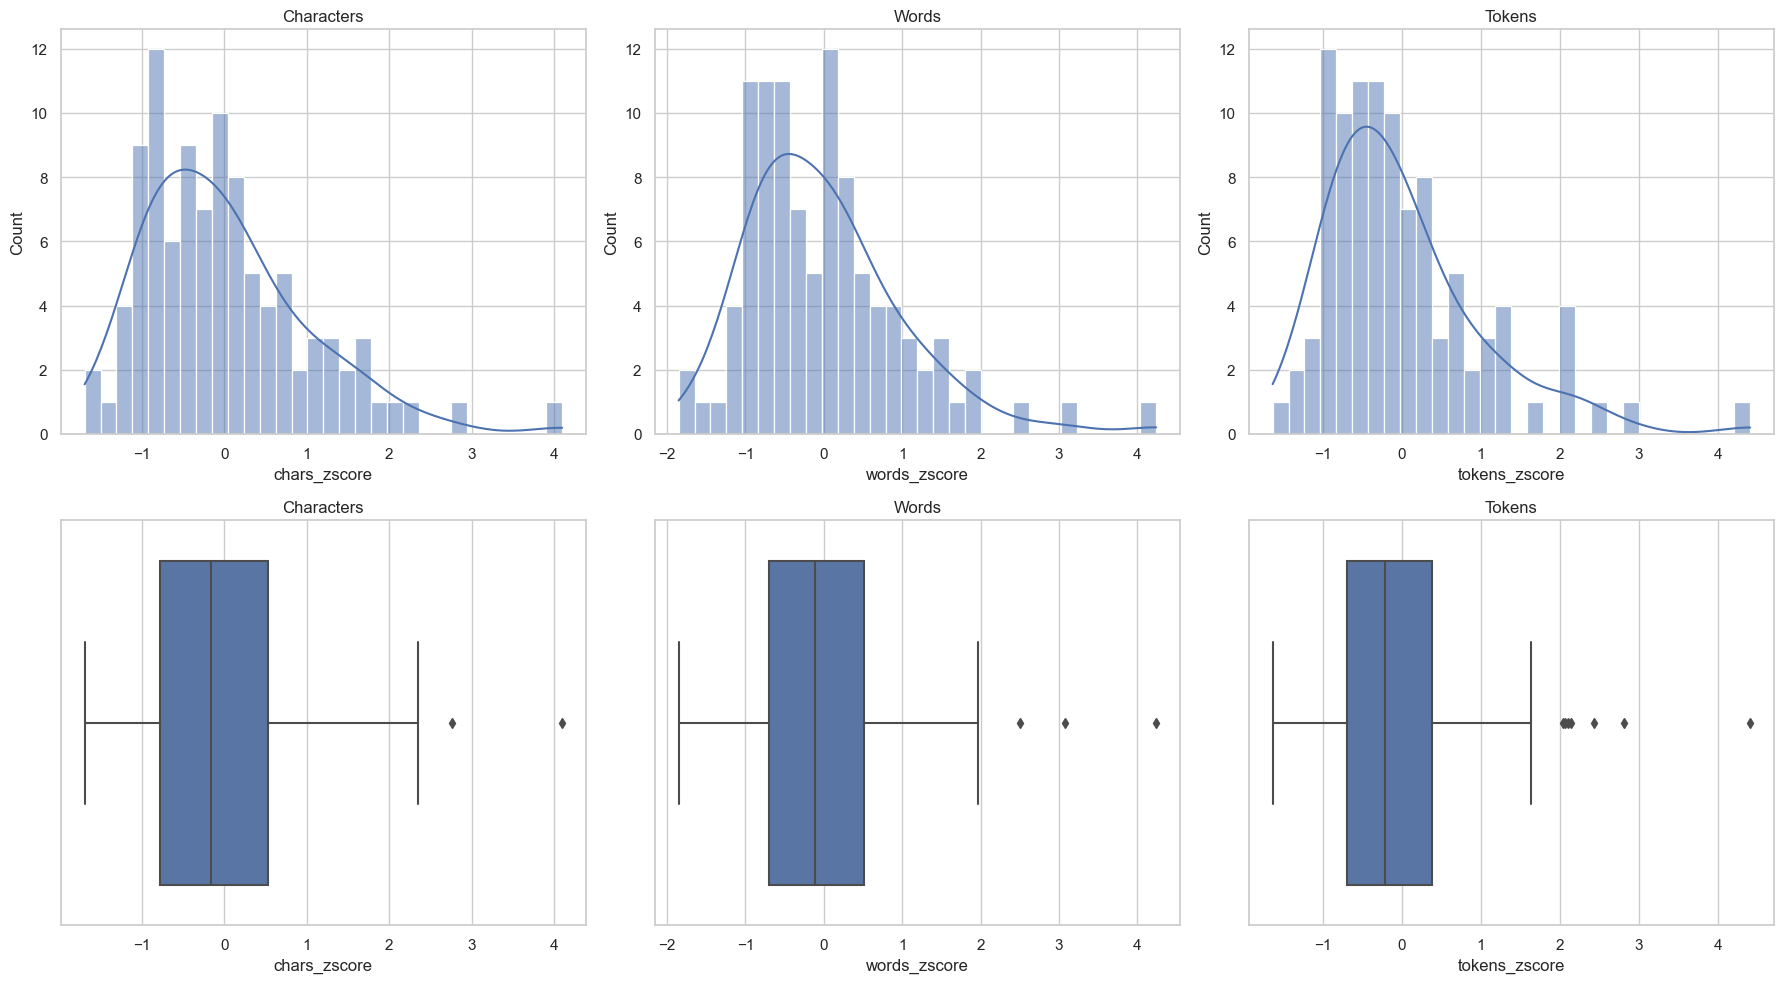

In [26]:
plot_distribution_comparison(read_data("explanation"))

# Statistical Tests - Comparing distributions of words, chars and tokens per text type

Theoretically I **could use parametric tests** (e.g. ANOVA) to compare means of distributions between social media posts, cover letters and essays, since the data is normally distributed.

However, I'm **not interested in comparing the means** of each distribution. Rather I want to compare the **entire shape** between distributions of `words`, `chars` and `tokens` per each text type.

To do this, I will use a non-parametric test called the **Kolmogorov-Smirnov** test.

**Assumptions**:
- samples are <u>independent</u> (each response was generated independently)
- samples are <u>identically distributed</u> (shapiro-wilk test shows that they are - p-values per text type were similar)
- samples are <u>continuous</u> (they are discrete, but we can assume they are continuous - because we have many, large and unique values, there would be a problem if we had many tied values in counts)

Before comducting the test we have to **normalize** the data, because it is on slighlty different scales. We are **not using scaling** (e.g. MinMaxScaler) because **we want to preserve the shape of the distribution** without stretching or compressing it.

In [27]:
def kolmogorov_smirnov_test(data: pd.DataFrame):
    normalize_data(data)
    results = []
    columns = ["chars_zscore", "words_zscore", "tokens_zscore"]
    pairs = list(combinations(columns, 2))

    for pair in pairs:
        stat, p = ks_2samp(data[pair[0]], data[pair[1]])
        results.append((pair[0], pair[1], stat, p))

    results_df = pd.DataFrame(
        results, columns=["Column 1", "Column 2", "KS Statistic", "p-value"]
    )
    print(results_df)

In [28]:
kolmogorov_smirnov_test(read_data("email"))

       Column 1       Column 2  KS Statistic   p-value
0  chars_zscore   words_zscore          0.05  0.999689
1  chars_zscore  tokens_zscore          0.05  0.999689
2  words_zscore  tokens_zscore          0.04  0.999999


In [29]:
kolmogorov_smirnov_test(read_data("social"))

       Column 1       Column 2  KS Statistic   p-value
0  chars_zscore   words_zscore          0.05  0.999689
1  chars_zscore  tokens_zscore          0.07  0.968410
2  words_zscore  tokens_zscore          0.07  0.968410


In [30]:
kolmogorov_smirnov_test(read_data("cover"))

       Column 1       Column 2  KS Statistic   p-value
0  chars_zscore   words_zscore          0.07  0.968410
1  chars_zscore  tokens_zscore          0.06  0.994236
2  words_zscore  tokens_zscore          0.06  0.994236


In [31]:
kolmogorov_smirnov_test(read_data("essay"))

       Column 1       Column 2  KS Statistic   p-value
0  chars_zscore   words_zscore          0.07  0.968410
1  chars_zscore  tokens_zscore          0.06  0.994236
2  words_zscore  tokens_zscore          0.05  0.999689


In [32]:
kolmogorov_smirnov_test(read_data("explanation"))

       Column 1       Column 2  KS Statistic   p-value
0  chars_zscore   words_zscore          0.06  0.994236
1  chars_zscore  tokens_zscore          0.06  0.994236
2  words_zscore  tokens_zscore          0.08  0.908411


**Null Hypothesis**: Distributions of `words`, `chars` and `tokens` per each text type are identical.

We **fail to reject the null hypothesis** for all text types, because p-values are very high.

# EDA - Determining length of short, medium and long piece of text per text type

This is to determine the **template-specific length defining keywords (descriptors)** for the experiment.

I will base my judgement on the quartiles (25th, 50th and 75th) of distributions; of number of words, characters and tokens in the responses.

### Reusable functions

In [44]:
def plot_histplot(data: pd.DataFrame, column: str, title: str):
    """Plots histogram with vertical lines at 25th, 50th, and 75th percentiles."""
    sns.histplot(data[column], bins=30, alpha=0.4)
    plt.title(title)
    plt.axvline(
        data[column].quantile(0.25),
        color="red",
        linestyle="--",
        label="25th percentile",
    )
    plt.axvline(
        data[column].quantile(0.5),
        color="green",
        linestyle="--",
        label="50th percentile",
    )
    plt.axvline(
        data[column].quantile(0.75),
        color="blue",
        linestyle="--",
        label="75th percentile",
    )
    plt.legend()
    plt.show()

In [45]:
def quartile_table(data: pd.DataFrame, type: str):
    """Creates table with 25th, 50th, and 75th percentiles for `chars`, `words`, and `tokens`.
    Rounds `chars` to nearest hundredth, `words` and `tokens` to nearest multiple of ten.
    """

    centiles_from_df_describe = data.describe().loc[["25%", "50%", "75%"], :]
    q_chars = centiles_from_df_describe[["chars"]].round(-2)
    q_words_tokens = centiles_from_df_describe[["words", "tokens"]].round(-1)
    table = pd.concat([q_chars, q_words_tokens], axis=1)  # combine tables
    table = table.astype(int)  # get rid of decimals

    print(f"Quantiles for: {type.upper()} CONTROL GROUP")
    print(table)
    print(
        f"\nON AVERAGE:\nShort email: {table.iloc[0, 0]} characters, {table.iloc[0, 1]} words, {table.iloc[0, 2]} tokens"
    )
    print(
        f"Medium email: {table.iloc[1, 0]} characters, {table.iloc[1, 1]} words, {table.iloc[1, 2]} tokens"
    )
    print(
        f"Long email: {table.iloc[2, 0]} characters, {table.iloc[2, 1]} words, {table.iloc[2, 2]} tokens"
    )

### Applying functions

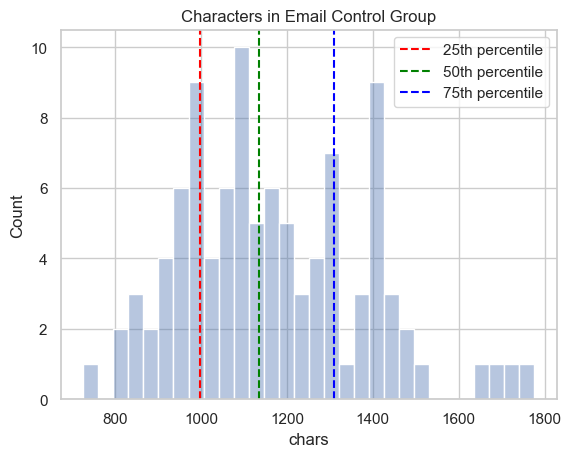

Quantiles for: EMAIL CONTROL GROUP
     chars  words  tokens
25%   1000    170     200
50%   1100    190     220
75%   1300    220     260

ON AVERAGE:
Short email: 1000 characters, 170 words, 200 tokens
Medium email: 1100 characters, 190 words, 220 tokens
Long email: 1300 characters, 220 words, 260 tokens


In [46]:
plot_histplot(read_data("email"), "chars", "Characters in Email Control Group")

quartile_table(read_data("email"), "email")

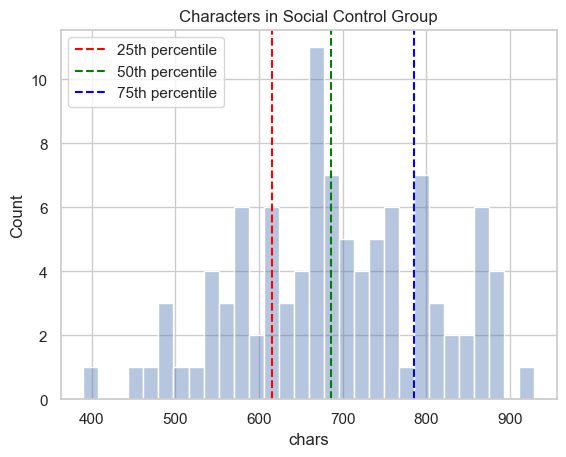

Quantiles for: SOCIAL CONTROL GROUP
     chars  words  tokens
25%    600    100     130
50%    700    110     150
75%    800    120     170

ON AVERAGE:
Short email: 600 characters, 100 words, 130 tokens
Medium email: 700 characters, 110 words, 150 tokens
Long email: 800 characters, 120 words, 170 tokens


In [47]:
plot_histplot(read_data("social"), "chars", "Characters in Social Control Group")

quartile_table(read_data("social"), "social")

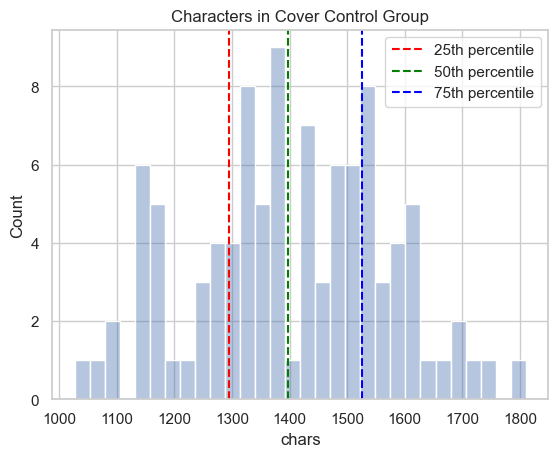

Quantiles for: COVER CONTROL GROUP
     chars  words  tokens
25%   1300    210     240
50%   1400    230     260
75%   1500    240     280

ON AVERAGE:
Short email: 1300 characters, 210 words, 240 tokens
Medium email: 1400 characters, 230 words, 260 tokens
Long email: 1500 characters, 240 words, 280 tokens


In [48]:
plot_histplot(read_data("cover"), "chars", "Characters in Cover Control Group")

quartile_table(read_data("cover"), "cover")

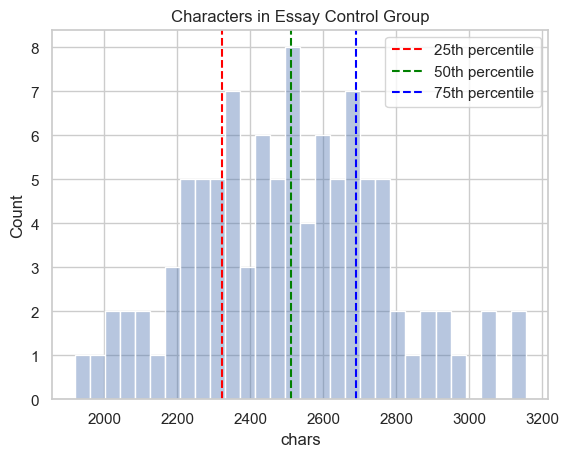

Quantiles for: ESSAY CONTROL GROUP
     chars  words  tokens
25%   2300    350     400
50%   2500    370     430
75%   2700    400     470

ON AVERAGE:
Short email: 2300 characters, 350 words, 400 tokens
Medium email: 2500 characters, 370 words, 430 tokens
Long email: 2700 characters, 400 words, 470 tokens


In [49]:
plot_histplot(read_data("essay"), "chars", "Characters in Essay Control Group")

quartile_table(read_data("essay"), "essay")

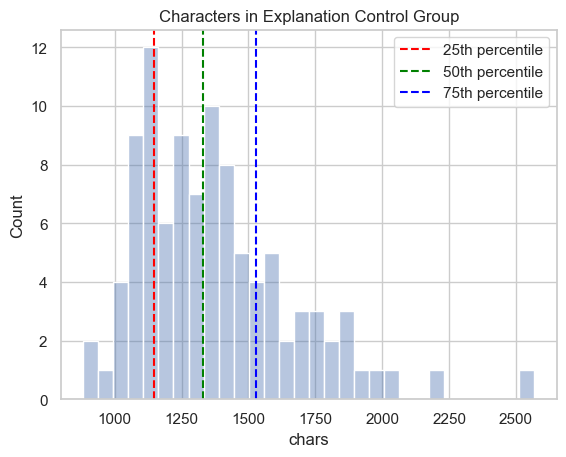

Quantiles for: EXPLANATION CONTROL GROUP
     chars  words  tokens
25%   1100    190     220
50%   1300    220     260
75%   1500    240     300

ON AVERAGE:
Short email: 1100 characters, 190 words, 220 tokens
Medium email: 1300 characters, 220 words, 260 tokens
Long email: 1500 characters, 240 words, 300 tokens


In [50]:
plot_histplot(read_data("explanation"), "chars", "Characters in Explanation Control Group")

quartile_table(read_data("explanation"), "explanation")